# Importing Lybraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pk
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, r2_score, explained_variance_score, mean_squared_error
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering

# Loading Dataset

In [6]:
df_i = pd.read_csv('Iris.csv')
df_i

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df_i = df_i.drop('Id', axis=1)
df_i.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df_i.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df_i.shape

(150, 5)

# Processing

In [13]:
le = preprocessing.LabelEncoder()
df_i['Species'] = le.fit_transform(df_i['Species'])

In [14]:
df_i.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Pickling Dataset

In [15]:
with open('iris.pkl', 'wb') as f:
    pk.dump(df_i, f)

In [6]:
with open('iris.pkl', 'rb') as f:
    iris = pk.load(f)

In [4]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Spliting Datasets

In [7]:
df_x = iris.drop('Species', axis=1)
df_y = iris['Species']

### Standerdizing Data

In [15]:
scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)

In [16]:
df_x.shape

(150, 4)

In [8]:
df_y.shape

(150,)

# Clustering

## K Means

In [15]:
grid_params = {
    'n_clusters': list(range(2, 10)),
    'algorithm': ['auto'],
    'random_state': [42],
    'init': ['k-means++'],
    'n_init': [3, 4, 5, 8, 10],
}
grid = GridSearchCV(KMeans(), grid_params, verbose=3, n_jobs=-1)
grid_model_kmean = grid.fit(df_x, df_y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.8s finished


In [16]:
grid_model_kmean.best_score_

-7.692310117981765

In [17]:
grid_model_kmean.best_params_

{'algorithm': 'auto',
 'init': 'k-means++',
 'n_clusters': 9,
 'n_init': 4,
 'random_state': 42}

### Fixing Values

In [27]:
kmeans = KMeans(n_clusters=9,
                n_init=4,
                init='k-means++',
                random_state=42,
                algorithm='auto').fit(df_x)
pred_kmeans = list(kmeans.predict(df_x))

In [32]:
centroids = kmeans.cluster_centers_
centroids

array([[6.44210526, 2.97894737, 4.59473684, 1.43157895],
       [5.07647059, 3.44705882, 1.52352941, 0.28823529],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.62083333, 2.69166667, 4.075     , 1.2625    ],
       [6.03684211, 2.70526316, 5.        , 1.77894737],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [4.69      , 3.085     , 1.385     , 0.19      ],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.4       , 3.89230769, 1.50769231, 0.26923077]])

In [29]:
print(pred_kmeans)

[1, 6, 6, 6, 1, 8, 6, 1, 6, 6, 8, 1, 6, 6, 8, 8, 8, 1, 8, 8, 1, 1, 6, 1, 1, 6, 1, 1, 1, 6, 6, 1, 8, 8, 6, 6, 8, 6, 6, 1, 1, 6, 6, 1, 8, 6, 8, 6, 8, 1, 0, 0, 0, 3, 0, 3, 0, 5, 0, 3, 5, 3, 3, 0, 3, 0, 3, 3, 4, 3, 4, 3, 4, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 4, 3, 0, 0, 0, 3, 3, 3, 0, 3, 5, 3, 3, 3, 0, 5, 3, 7, 4, 2, 7, 7, 2, 3, 2, 7, 2, 7, 4, 7, 4, 4, 7, 7, 2, 2, 4, 7, 4, 2, 4, 7, 2, 4, 4, 7, 2, 2, 2, 7, 4, 4, 2, 7, 7, 4, 7, 7, 7, 4, 7, 7, 7, 4, 7, 7, 4]


In [31]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 9,
 'n_init': 4,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

### Elbow Method

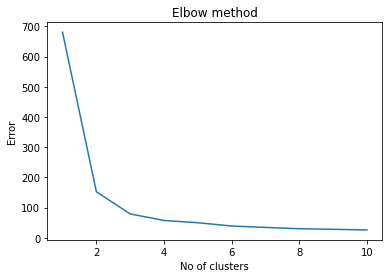

In [6]:
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    n_init=4,
                    init='k-means++',
                    random_state=42,
                    algorithm='auto').fit(df_x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3,
                n_init=4,
                init='k-means++',
                random_state=42,
                algorithm='auto').fit(df_x)
pred_kmeans = list(kmeans.predict(df_x))

In [8]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [9]:
centroids = kmeans.cluster_centers_
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [10]:
print(pred_kmeans)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0]


# Visualization

## K Means

In [9]:
plt.scatter(df_x[:, 0], df_x[:, 1], c=kmeans, cmap='rainbow')

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [12]:
df_x['Cluster']= pd.DataFrame(pred_kmeans, columns=['cluster'])

In [11]:
df_x.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,0


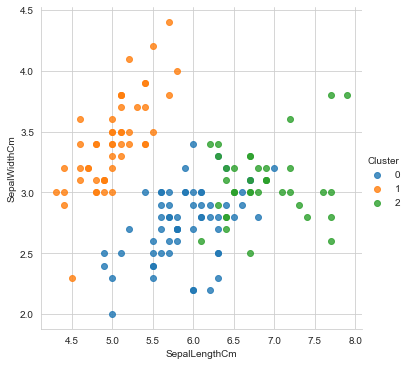

In [33]:
sns.set_style('whitegrid')
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=df_x, fit_reg=False, hue='Cluster', legend=True)

plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


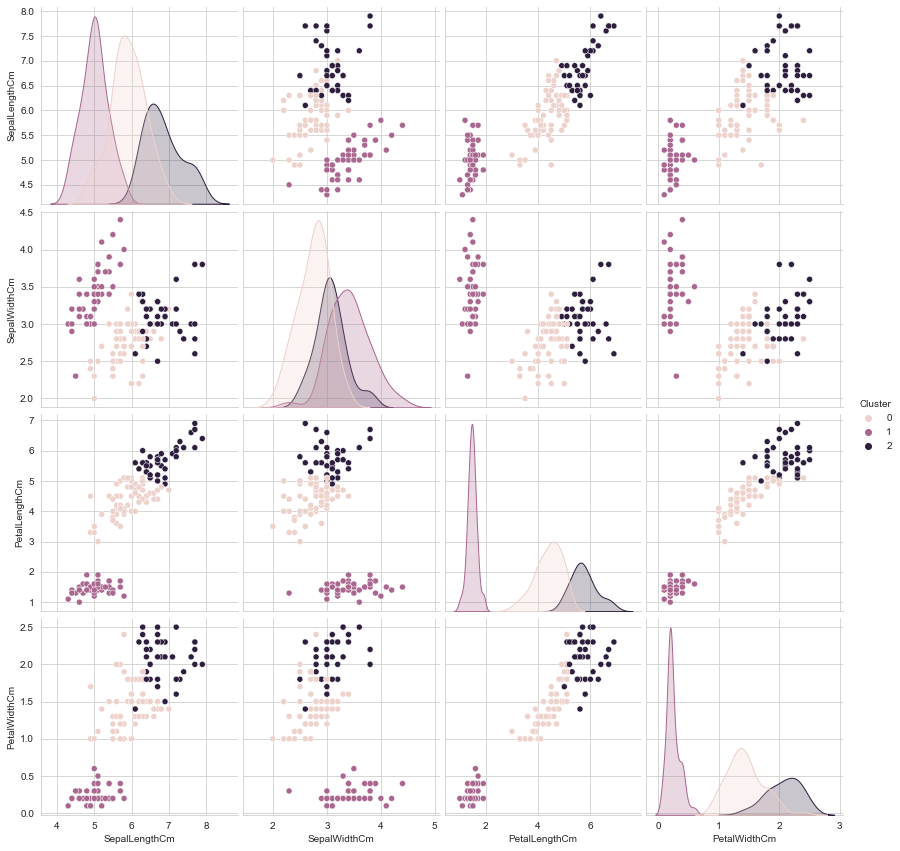

In [44]:
sns.pairplot(data=df_x, hue='Cluster', size=3)

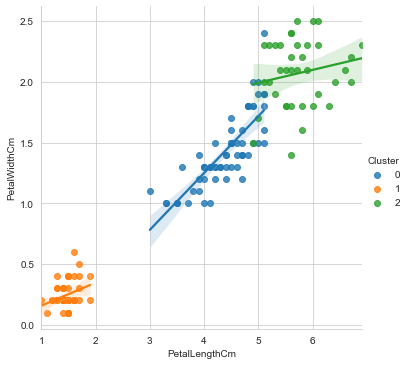

In [35]:
sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', data=df_x, fit_reg=True, hue='Cluster', legend=True)
plt.show()

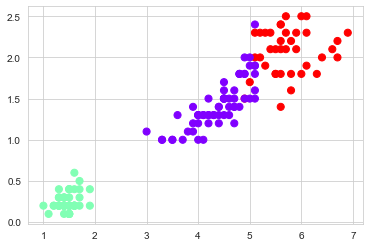

In [40]:
plt.scatter(df_x.PetalLengthCm, df_x.PetalWidthCm, c=pred_kmeans, cmap='rainbow', s=50)
plt.show()

# Aggloremative Clustering

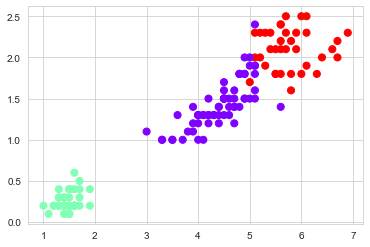

In [46]:
sns.set_style('whitegrid')
plt.scatter(df_x.PetalLengthCm, df_x.PetalWidthCm, c=labels, cmap='rainbow', s=50)
plt.show()

In [50]:
ac = AgglomerativeClustering(memory='mycachedir', 
                             compute_full_tree=True)
classifier = GridSearchCV(ac, 
                          {'n_clusters': range(2,6)}, 
                          scoring = 'adjusted_rand_score', 
                          n_jobs=-1, verbose=2)
classifier.fit(df_x, df_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    1.7s remaining:    0.4s


AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

In [37]:
grid_params = {
    'n_clusters': list(range(2, 10)),
    'affinity': ['euclidean'],
    'linkage': ['ward', 'single', 'complete']
    
}
grid = GridSearchCV(AgglomerativeClustering(), grid_params, verbose=3, n_jobs=-1)
grid_clustring_agglo = grid.fit(df_x)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator AgglomerativeClustering() does not.

In [20]:
grid_clustring_agglo.best_score_

NameError: name 'grid_clustring_agglo' is not defined

In [21]:
grid_clustring_agglo.best_params_

NameError: name 'grid_clustring_agglo' is not defined

In [24]:
import scipy.cluster.hierarchy as sch

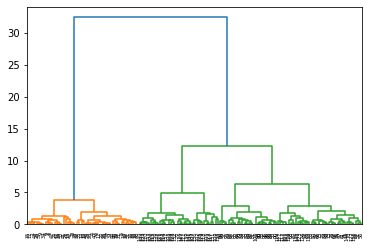

In [29]:
dendrogram = sch.dendrogram(sch.linkage(df_x, method='ward'))

In [13]:
model = AgglomerativeClustering(n_clusters=3,
                                linkage='ward',
                                affinity='euclidean').fit(df_x)
labels = model.labels_

In [14]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [15]:
df_x[labels==2].head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
52,6.9,3.1,4.9,1.5,2
77,6.7,3.0,5.0,1.7,2
100,6.3,3.3,6.0,2.5,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2


In [16]:
plt.scatter(df_x[labels == 0, 0],
            df_x[labels == 0, 1],
            s=50,
            marker='o',
            color='red')
plt.scatter(df_x[labels == 1, 0],
            df_x[labels == 1, 1],
            s=50,
            marker='o',
            color='blue')
plt.scatter(df_x[labels == 2, 0],
            df_x[labels == 2, 1],
            s=50,
            marker='o',
            color='green')
# plt.scatter(df_x[labels==3, 0], df_x[labels==3, 1], s=50, marker='o', color='purple')
# plt.scatter(df_x[labels==4, 0], df_x[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

TypeError: '(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False,  True]), 0)' is an invalid key

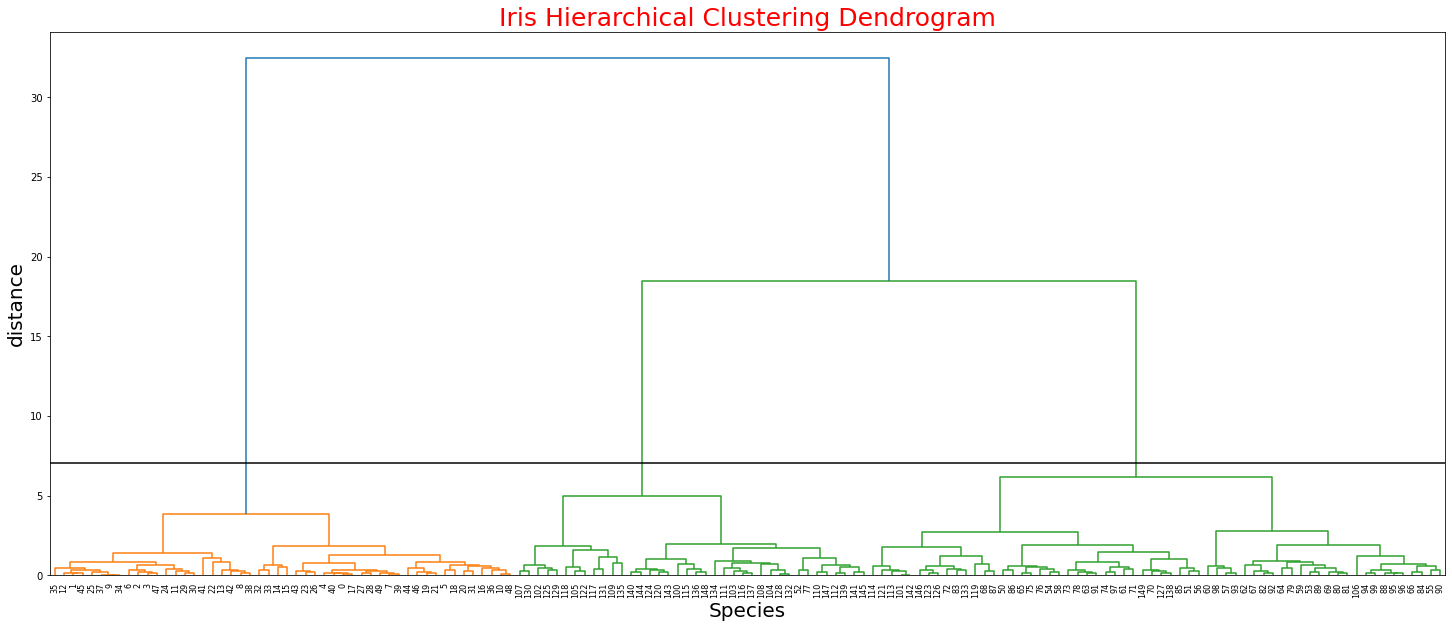

In [33]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(df_x, 'ward')

# set cut-off to 150
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram', fontsize=25, color='red')
plt.xlabel('Species', fontsize= 20)
plt.ylabel('distance', fontsize= 20)
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

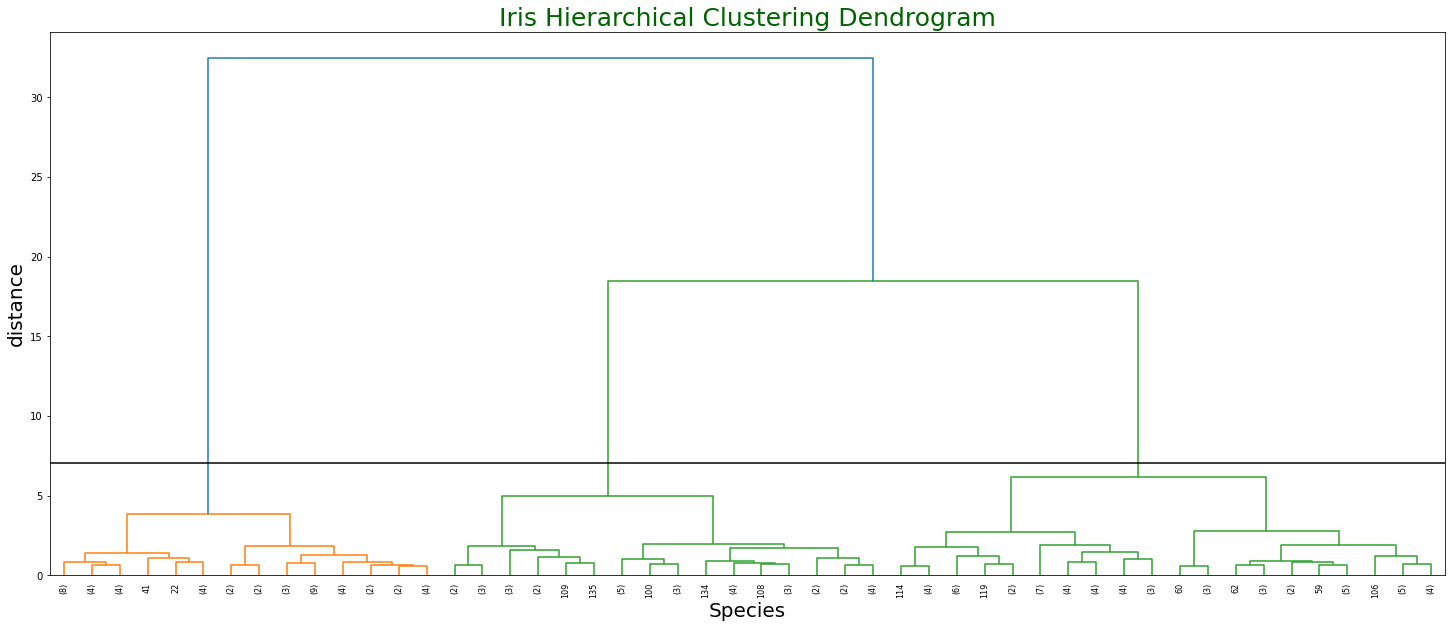

In [34]:
# calculate full dendrogram for 50
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(df_x, 'ward')

# set cut-off to 50
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram', fontsize=25, color='darkgreen')
plt.xlabel('Species', fontsize= 20)
plt.ylabel('distance', fontsize= 20)
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=50,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

In [35]:
df_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
